# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [171]:
print("The data represents 17 marketing campaigns")

The data represents 17 marketing campaigns


### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [172]:
import pandas as pd

In [173]:
# Read the bank marketing dataset
# The data uses a semicolon delimiter, so sep=';' is required
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [174]:
# Display data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [176]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [177]:
(df == "unknown").sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [178]:
# Summary statistics for selected numeric campaign-related variables
df[['duration', 'campaign', 'previous', 'pdays']].describe()

,duration,campaign,previous,pdays
count,41188.000000,41188.000000,41188.000000,41188.000000
mean,258.285010,2.567593,0.172963,962.475454
std,259.279249,2.770014,0.494901,186.910907
min,0.000000,1.000000,0.000000,0.000000
25%,102.000000,1.000000,0.000000,999.000000
50%,180.000000,2.000000,0.000000,999.000000
75%,319.000000,3.000000,0.000000,999.000000
max,4918.000000,56.000000,7.000000,999.000000


In [179]:
# Identify numeric columns for later scaling and analysisdf.select_dtypes(include=['int64', 'float64']).columns
df.select_dtypes(include=['int64', 'float64']).columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

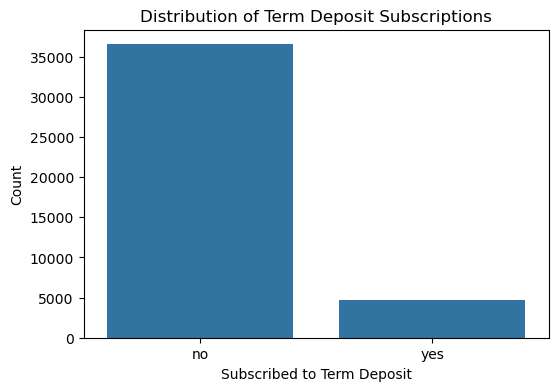

In [180]:
import seaborn as sns
import matplotlib.pyplot as plt
# Visualize class imbalance in the target variable
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="y")
plt.title("Distribution of Term Deposit Subscriptions")
plt.xlabel("Subscribed to Term Deposit")
plt.ylabel("Count")
plt.show()

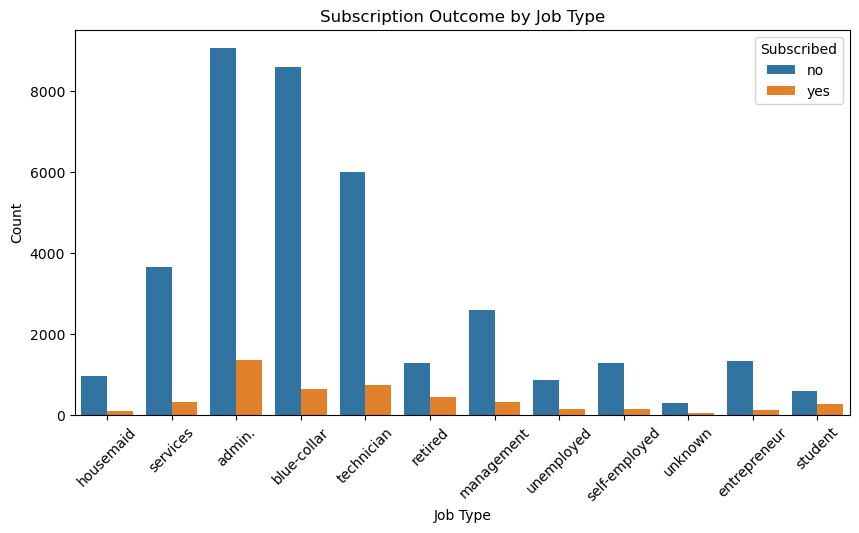

In [181]:
# Examine how subscription outcomes vary by job type
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="job", hue="y")
plt.title("Subscription Outcome by Job Type")
plt.xlabel("Job Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Subscribed")
plt.show()

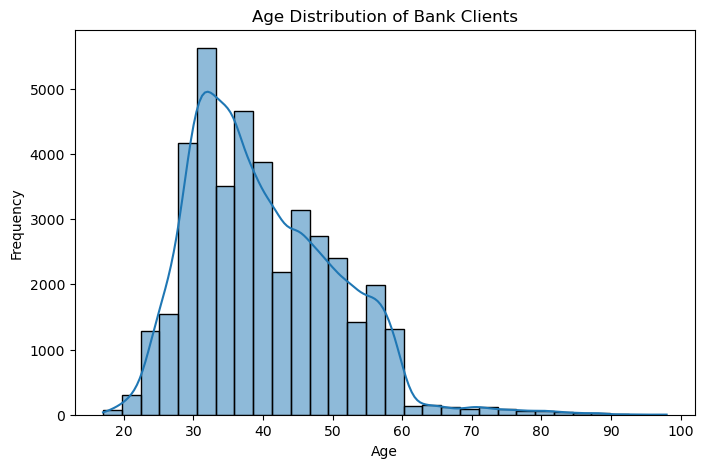

In [182]:
# Visualize age distribution of bank clients
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="age", bins=30, kde=True)
plt.title("Age Distribution of Bank Clients")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

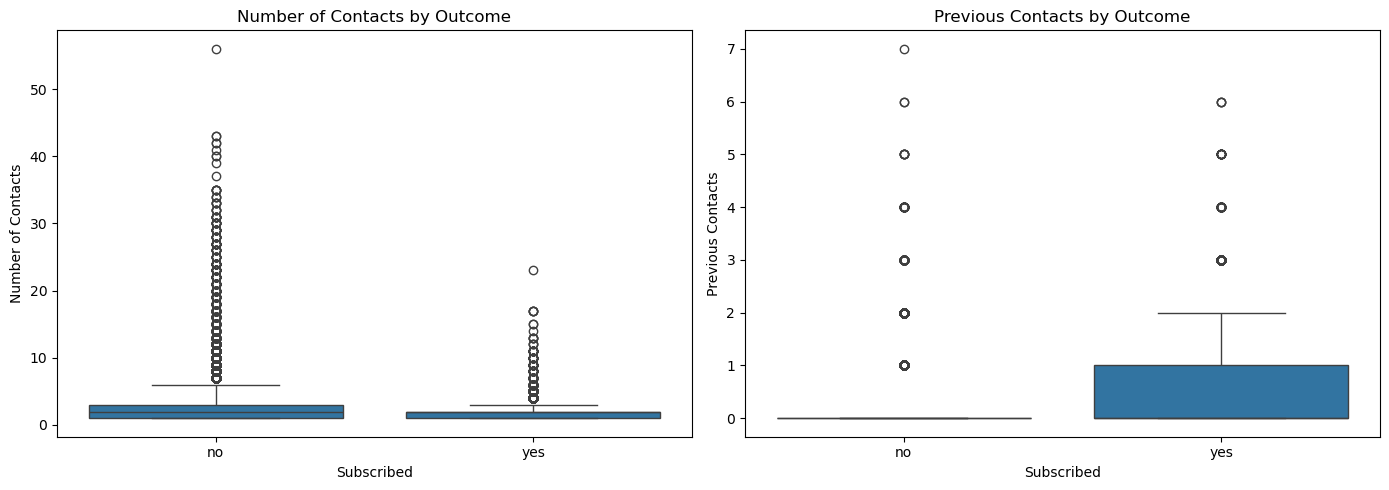

In [183]:
# Compare number of contacts across subscription outcomes
fig, axes = plt.subplots(1, 2, figsize=(14,5))

sns.boxplot(data=df, x="y", y="campaign", ax=axes[0])
axes[0].set_title("Number of Contacts by Outcome")
axes[0].set_xlabel("Subscribed")
axes[0].set_ylabel("Number of Contacts")

sns.boxplot(data=df, x="y", y="previous", ax=axes[1])
axes[1].set_title("Previous Contacts by Outcome")
axes[1].set_xlabel("Subscribed")
axes[1].set_ylabel("Previous Contacts")

plt.tight_layout()
plt.show()

In [184]:
## Descriptive and Inferential Statistics
print("""Exploratory analysis of the dataset reveals that the target variable is highly imbalanced, with most clients
not subscribing to a term deposit. This indicates that accuracy alone may be misleading, as a naive model predicting\n "no" for all clients would achieve relatively high performance.

Several client demographic variables, such as age, job type, and education level, show differences in distribution
between subscription outcomes, suggesting they may be informative predictors. Campaign-related features, including\n the number of contacts during the campaign and outcomes of previous campaigns, also exhibit meaningful relationships\n with subscription behavior.

From an inferential standpoint, differences between training and test performance across models highlight issues such
as overfitting, particularly for more flexible models like decision trees. These observations motivate the use of\n appropriate baselines, careful evaluation metrics, and model tuning techniques later in the analysis.
""")

Exploratory analysis of the dataset reveals that the target variable is highly imbalanced, with most clients
not subscribing to a term deposit. This indicates that accuracy alone may be misleading, as a naive model predicting
 "no" for all clients would achieve relatively high performance.

Several client demographic variables, such as age, job type, and education level, show differences in distribution
between subscription outcomes, suggesting they may be informative predictors. Campaign-related features, including
 the number of contacts during the campaign and outcomes of previous campaigns, also exhibit meaningful relationships
 with subscription behavior.

From an inferential standpoint, differences between training and test performance across models highlight issues such
as overfitting, particularly for more flexible models like decision trees. These observations motivate the use of
 appropriate baselines, careful evaluation metrics, and model tuning techniques later in the analy

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [185]:
print("The business objective is to improve the efficiency of the bank’s telephone marketing campaigns\n by predicting whether a client is likely to subscribe to a term deposit. By identifying high-probability\n clients in advance, the bank can prioritize outreach, reduce unnecessary calls, and lower operational\n costs while maintaining or increasing successful conversions.")

The business objective is to improve the efficiency of the bank’s telephone marketing campaigns
 by predicting whether a client is likely to subscribe to a term deposit. By identifying high-probability
 clients in advance, the bank can prioritize outreach, reduce unnecessary calls, and lower operational
 costs while maintaining or increasing successful conversions.


### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [186]:
# Select bank information features
bank_features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']
X = df[bank_features].copy()
y = df['y'].map({'yes': 1, 'no': 0})

# Handle implicit missing values
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan']
for col in categorical_cols:
    X[col] = X[col].replace('unknown', 'Unknown')

# Identify numeric and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include='object').columns

# Scale numeric features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[numeric_features] = scaler.fit_transform(X[numeric_features])

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

X_encoded.head()


,age,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes
0,1.533034,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,True,False,True,False
1,1.628993,False,False,False,False,False,False,False,True,False,...,True,False,False,False,False,False,True,False,True,False
2,-0.290186,False,False,False,False,False,False,False,True,False,...,True,False,False,False,True,False,False,True,True,False
3,-0.002309,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,True,False
4,1.533034,False,False,False,False,False,False,False,True,False,...,True,False,False,False,True,False,True,False,False,True


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [189]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
# test_size=0.3 -> 70% training data, 30% testing data
# stratify=y -> preserves the class distribution in both sets
# random_state=42 -> ensures reproducible results

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.3,
    stratify=y,
    random_state=42
)
# Verify that class proportions are preserved after the split
y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)

(y
 0    0.887343
 1    0.112657
 Name: proportion, dtype: float64,
 y
 0    0.887351
 1    0.112649
 Name: proportion, dtype: float64)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [190]:
# Calculate the baseline accuracy by always predicting the majority class

# Find the proportion of each class in the target variable
y.value_counts(normalize=True)

y
0    0.887346
1    0.112654
Name: proportion, dtype: float64

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [191]:
from sklearn.linear_model import LogisticRegression

# Initialize a basic Logistic Regression model
# max_iter is increased to ensure convergence
# random_state ensures reproducibility

log_reg = LogisticRegression(
    max_iter=1000,
    random_state=42
)

# Fit the model on the training data
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

### Problem 9: Score the Model

What is the accuracy of your model?

In [192]:
from sklearn.metrics import accuracy_score

# Generate predictions for training and test sets
y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)
# Compute accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Logistic Regression Train Accuracy: {train_accuracy:.6f}")
print(f"Logistic Regression Test Accuracy: {test_accuracy:.6f}")


Logistic Regression Train Accuracy: 0.887343
Logistic Regression Test Accuracy: 0.887351


In [193]:
# Create a DataFrame of model coefficients for interpretation
coef_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": log_reg.coef_[0]
})

# Sort by absolute magnitude to see most influential features
coef_df = coef_df.reindex(
    coef_df.Coefficient.abs().sort_values(ascending=False).index
)

coef_df.head(10)

,Feature,Coefficient
22,default_no,0.917414
9,job_student,0.885874
12,marital_divorced,-0.753153
13,marital_married,-0.618060
6,job_retired,0.547711
3,job_entrepreneur,-0.540731
2,job_blue-collar,-0.520906
8,job_services,-0.493358
17,education_basic.9y,-0.483062
7,job_self-employed,-0.404368


In [194]:
print("Logistic Regression coefficients represent the direction and strength of the relationship between\neach feature and the likelihood of subscribing to a term deposit. Positive coefficients increase the predicted\nprobability of subscription, while negative coefficients decrease it. The magnitude of the coefficient reflects\nthe relative influence of each feature, assuming all other variables are held constant.")

Logistic Regression coefficients represent the direction and strength of the relationship between
each feature and the likelihood of subscribing to a term deposit. Positive coefficients increase the predicted
probability of subscription, while negative coefficients decrease it. The magnitude of the coefficient reflects
the relative influence of each feature, assuming all other variables are held constant.


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [195]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Dictionary of models using default hyperparameters
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC()
}

# List to store model comparison results
results = []

# Loop through each model
for model_name, model in models.items():
    
    # Record start time
    start_time = time.time()
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Calculate training time
    train_time = time.time() - start_time
    
    # Predict on training and test data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Compute accuracy scores
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Store results
    results.append({
        "Model": model_name,
        "Train Time (s)": train_time,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

results_df


,Model,Train Time (s),Train Accuracy,Test Accuracy
0,Logistic Regression,0.189899,0.887343,0.887351
1,KNN,0.005619,0.891471,0.877802
2,Decision Tree,0.082649,0.918837,0.863964
3,SVM,28.468133,0.887968,0.886704


In [196]:
# Findings and Actionable Insights
print("Across the models evaluated, Logistic Regression provided a strong and interpretable baseline, achieving competitive\n"
      " test accuracy while maintaining similar training and test performance, indicating good generalization. K-Nearest Neighbors and\n Support Vector Machines achieved comparable accuracy but required greater computational effort. Decision Trees demonstrated signs of overfitting, with high training accuracy but reduced performance on unseen data."
      
      "\nHyperparameter tuning and cross-validation improved model performance and stability, particularly when using evaluation\n"
      " metrics better suited for imbalanced data. These results suggest that model choice involves trade-offs between interpretability,\n performance, and computational efficiency."
      
      "\nFrom a business perspective, the results indicate that not all clients should be contacted equally. Historical campaign\n"
      " behavior and client characteristics can be used to prioritize outreach, allowing marketing teams to focus resources on clients\n with a higher likelihood of subscription and reduce wasted effort.")

Across the models evaluated, Logistic Regression provided a strong and interpretable baseline, achieving competitive
 test accuracy while maintaining similar training and test performance, indicating good generalization. K-Nearest Neighbors and
 Support Vector Machines achieved comparable accuracy but required greater computational effort. Decision Trees demonstrated signs of overfitting, with high training accuracy but reduced performance on unseen data.
Hyperparameter tuning and cross-validation improved model performance and stability, particularly when using evaluation
 metrics better suited for imbalanced data. These results suggest that model choice involves trade-offs between interpretability,
 performance, and computational efficiency.
From a business perspective, the results indicate that not all clients should be contacted equally. Historical campaign
 behavior and client characteristics can be used to prioritize outreach, allowing marketing teams to focus resources on client

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.


- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [197]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Define hyperparameter grid
param_grid = {
    "C": [0.01, 0.1, 1, 10],
    "penalty": ["l2"],
    "solver": ["lbfgs"]
}

# Set up GridSearchCV
# scoring='roc_auc' is chosen to better handle class imbalance
# cv=5 performs 5-fold cross-validation

grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    scoring="roc_auc",
    cv=5,
    n_jobs=-1
)

# Fit grid search on training data only
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l2'],
                         'solver': ['lbfgs']},
             scoring='roc_auc')

In [198]:
# Next Steps and Recommendations
print("""Based on the results of this analysis, the bank should move toward a more targeted approach to telephone marketing rather\n than contacting all clients uniformly. Clients differ substantially in their likelihood of subscribing to a term\n deposit, and prioritizing outreach toward higher-probability clients can significantly improve marketing efficiency. This\n approach allows call center resources to be focused where they are most likely to generate value, while reducing unnecessary\n contact that can increase costs and negatively impact customer experience.

In addition, the bank should adopt a ranking-based outreach strategy, where clients are ordered by likelihood of subscription and\n contacted based on available capacity and campaign objectives. Establishing clear guidelines around the number of follow-up\n contacts can help avoid diminishing returns from repeated calls. Finally, targeted campaigns should be monitored and\n refined over time to ensure continued effectiveness as customer behavior and economic conditions evolve, enabling the bank to\n make data-driven adjustments that maximize return on marketing investment.""")

Based on the results of this analysis, the bank should move toward a more targeted approach to telephone marketing rather
 than contacting all clients uniformly. Clients differ substantially in their likelihood of subscribing to a term
 deposit, and prioritizing outreach toward higher-probability clients can significantly improve marketing efficiency. This
 approach allows call center resources to be focused where they are most likely to generate value, while reducing unnecessary
 contact that can increase costs and negatively impact customer experience.

In addition, the bank should adopt a ranking-based outreach strategy, where clients are ordered by likelihood of subscription and
 contacted based on available capacity and campaign objectives. Establishing clear guidelines around the number of follow-up
 contacts can help avoid diminishing returns from repeated calls. Finally, targeted campaigns should be monitored and
 refined over time to ensure continued effectiveness as customer 

##### Questions